# Innitialization

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [83]:
%matplotlib widget

from matplotlib import pyplot as plt

In [3]:
import os, sys
print(os.getcwd())
sys.path.append("..")

C:\Users\Wang\OneDrive\Data science\S2DS\Aug22_EPRI_Red\notebooks


In [4]:
import helpers.flow_loop_preprocess_XW as process

In [9]:
raw = pd.read_csv('../../Data/flow_loop/processed/Flow_Loop_Data_080122.csv')

C:\Users\Wang\AppData\Local\Temp\ipykernel_18672\491813969.py:1: DtypeWarning: Columns (0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv('../../Data/flow_loop/processed/Flow_Loop_Data_080122.csv')


In [14]:
df_clean = pd.read_csv('../../Data/flow_loop/cleaned/Flow_Loop_Data_072822.csv')

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              12001 non-null  object 
 1   FIT102_Raw_Signal  10334 non-null  float64
 2   FIT202_Raw_Signal  11852 non-null  float64
 3   LIT101_Raw_Signal  11704 non-null  float64
 4   LIT201_Raw_Signal  7996 non-null   float64
 5   PIT101_Raw_Signal  8684 non-null   float64
 6   PIT102_Raw_Signal  10863 non-null  float64
 7   PIT201_Raw_Signal  11221 non-null  float64
 8   PIT202_Raw_Signal  11374 non-null  float64
 9   SI102_Raw_Signal   9780 non-null   float64
 10  SI202_Raw_Signal   11762 non-null  float64
 11  event              12001 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.1+ MB


setting the raw df to a nice format

# EDA

## plot each feature against its timestamp

C:\Users\Wang\OneDrive\Data science\S2DS\Aug22_EPRI_Red\notebooks\..\helpers\flow_loop_preprocess_XW.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data.dropna(inplace=True)


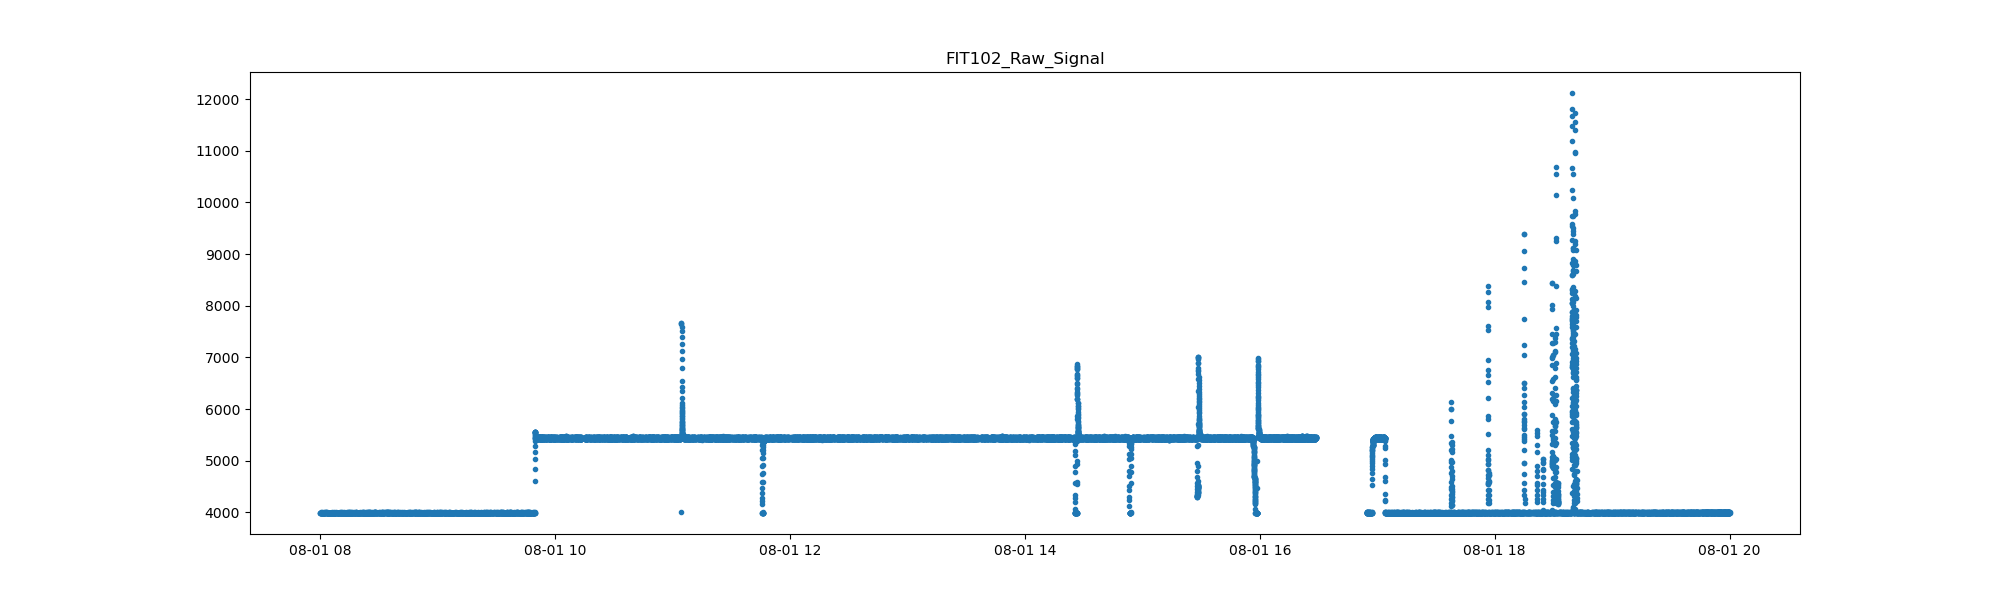

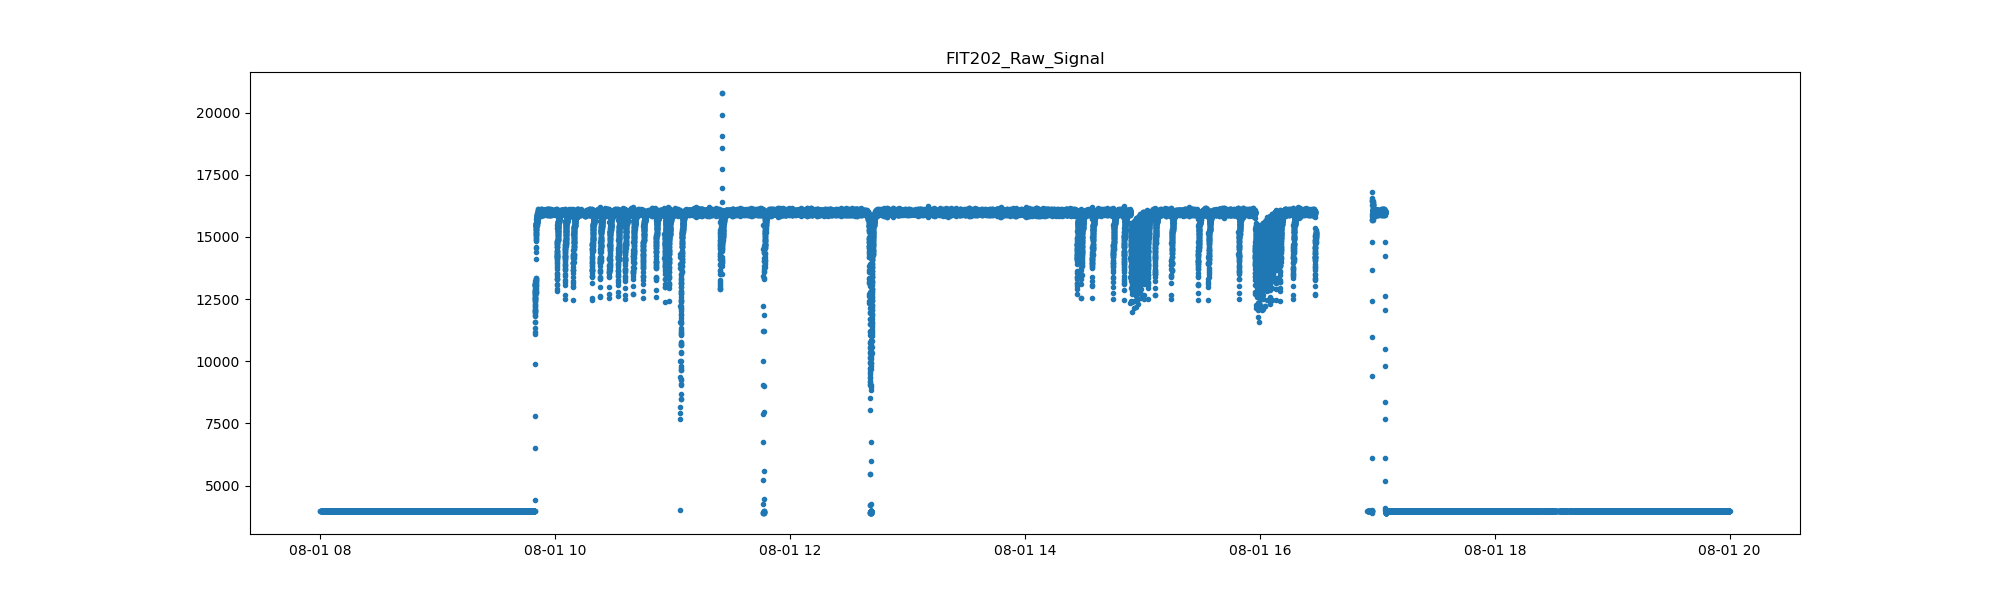

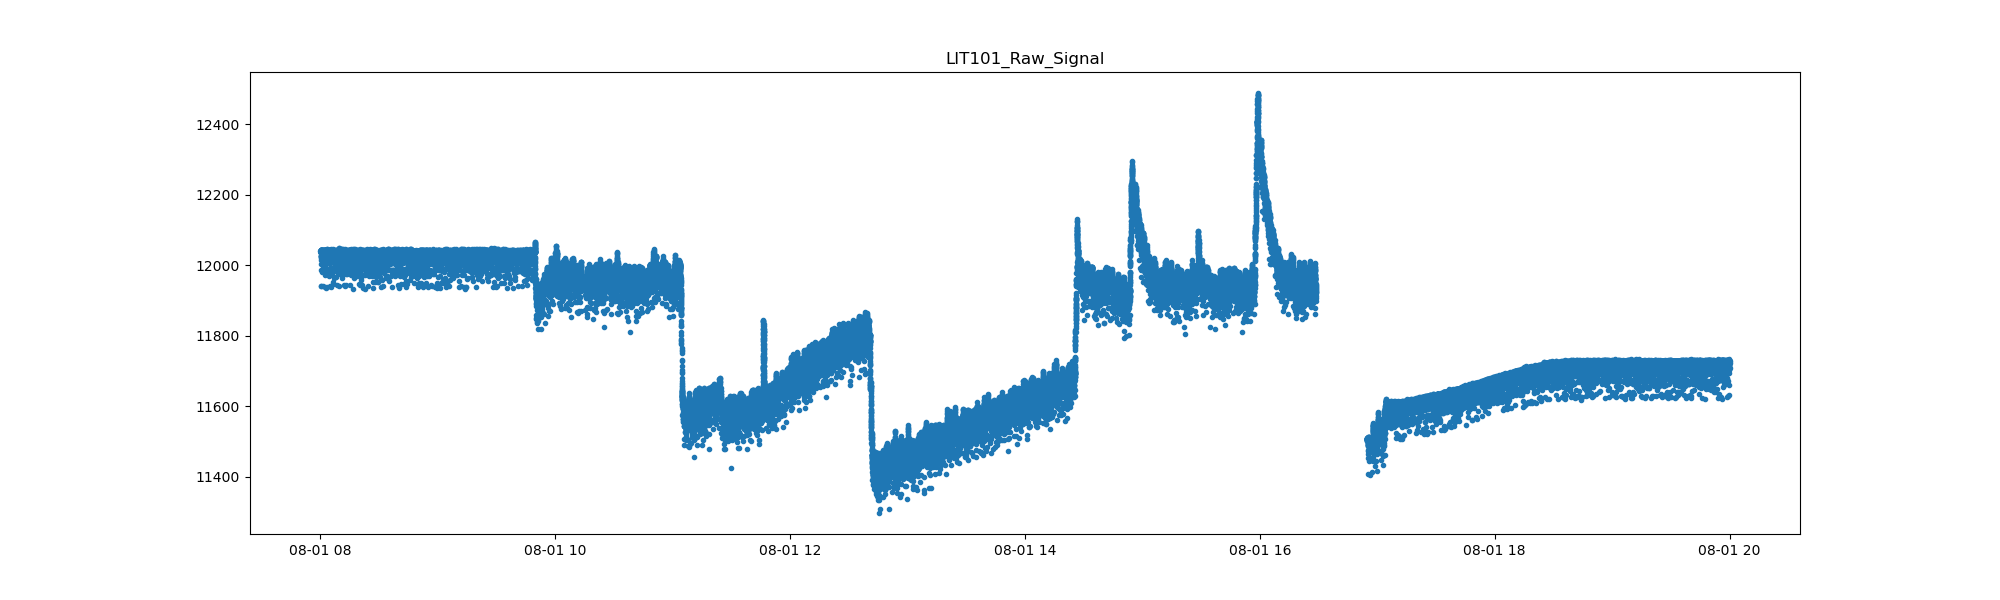

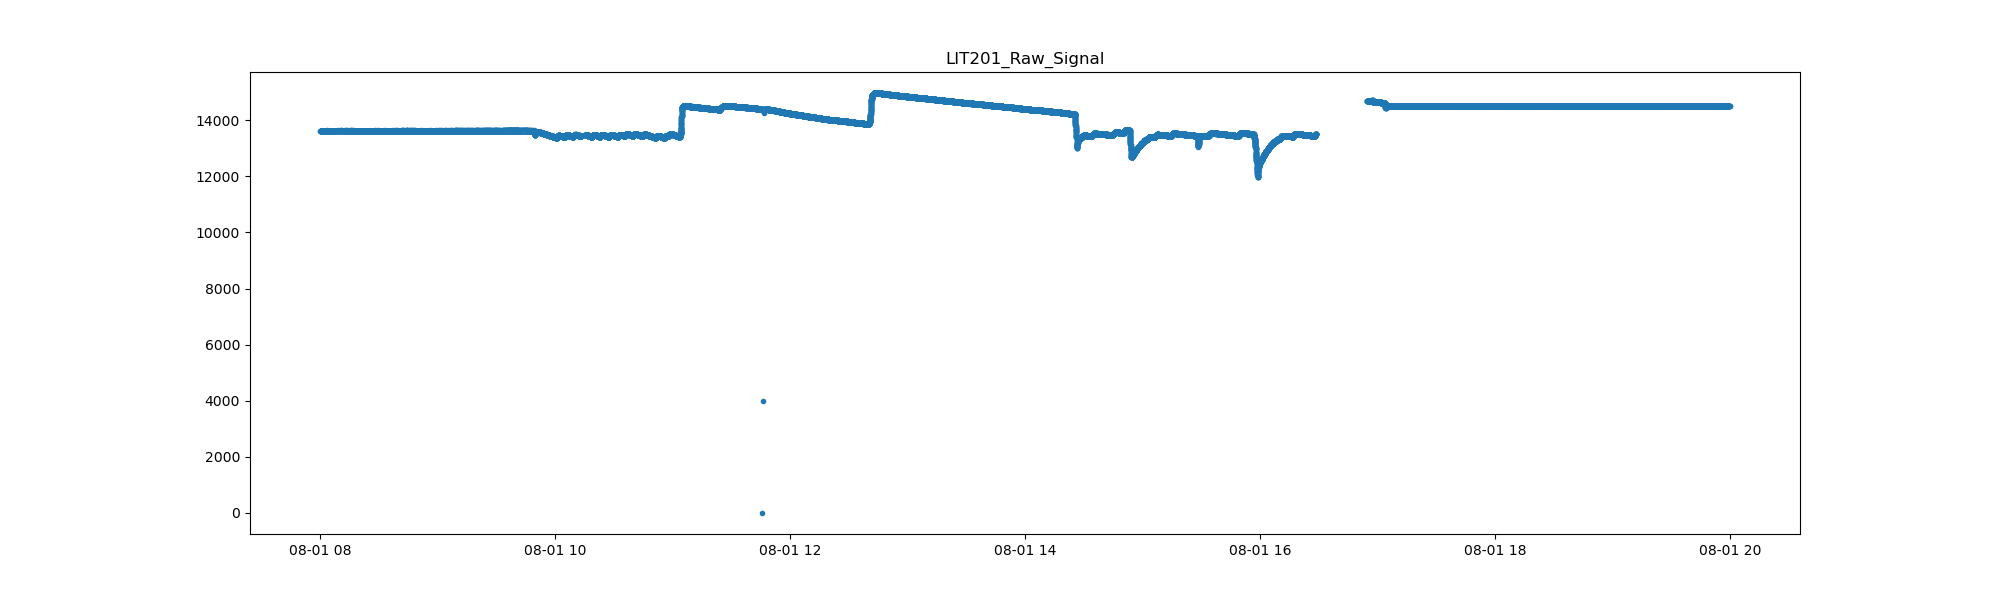

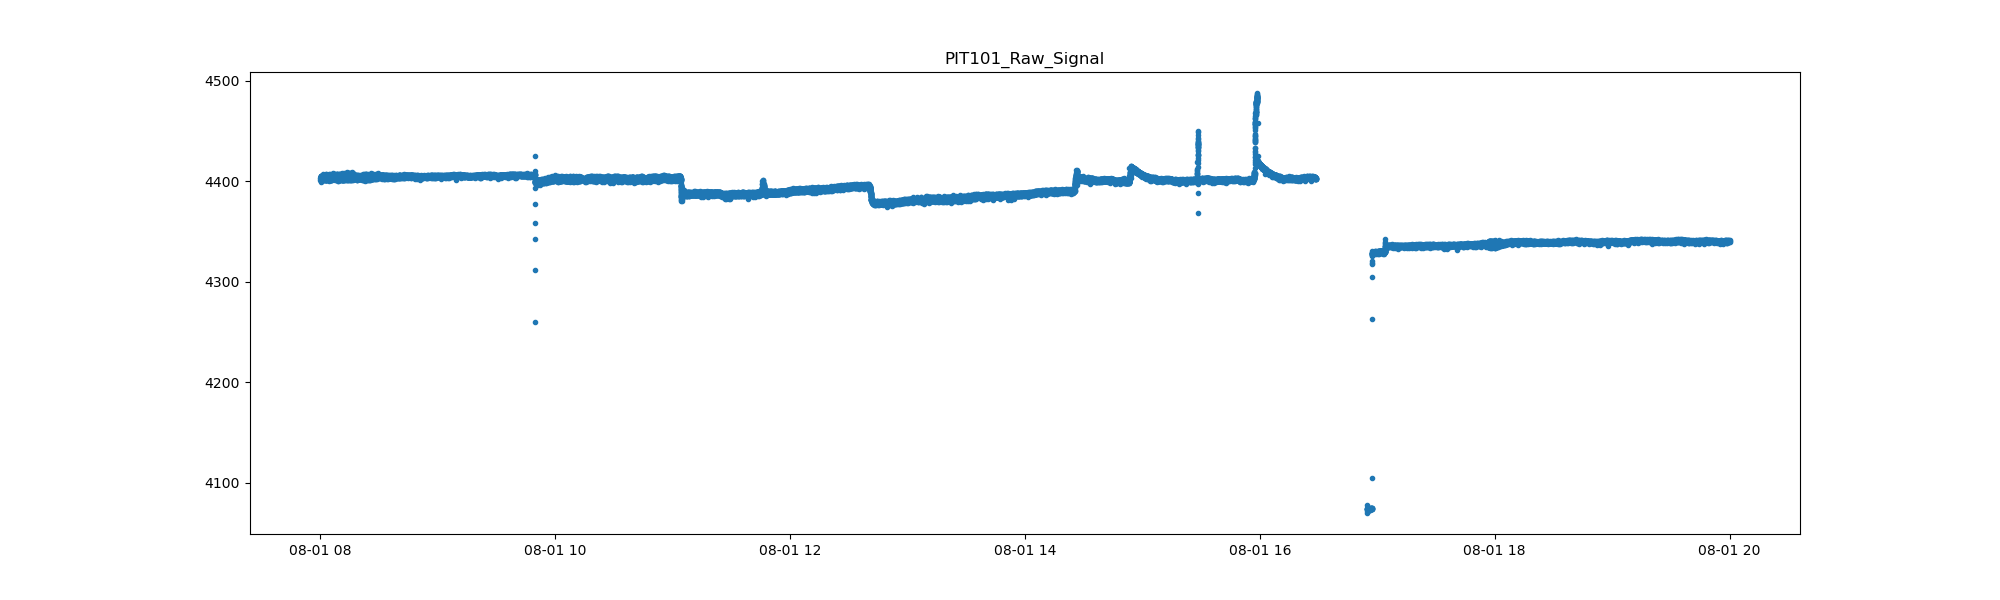

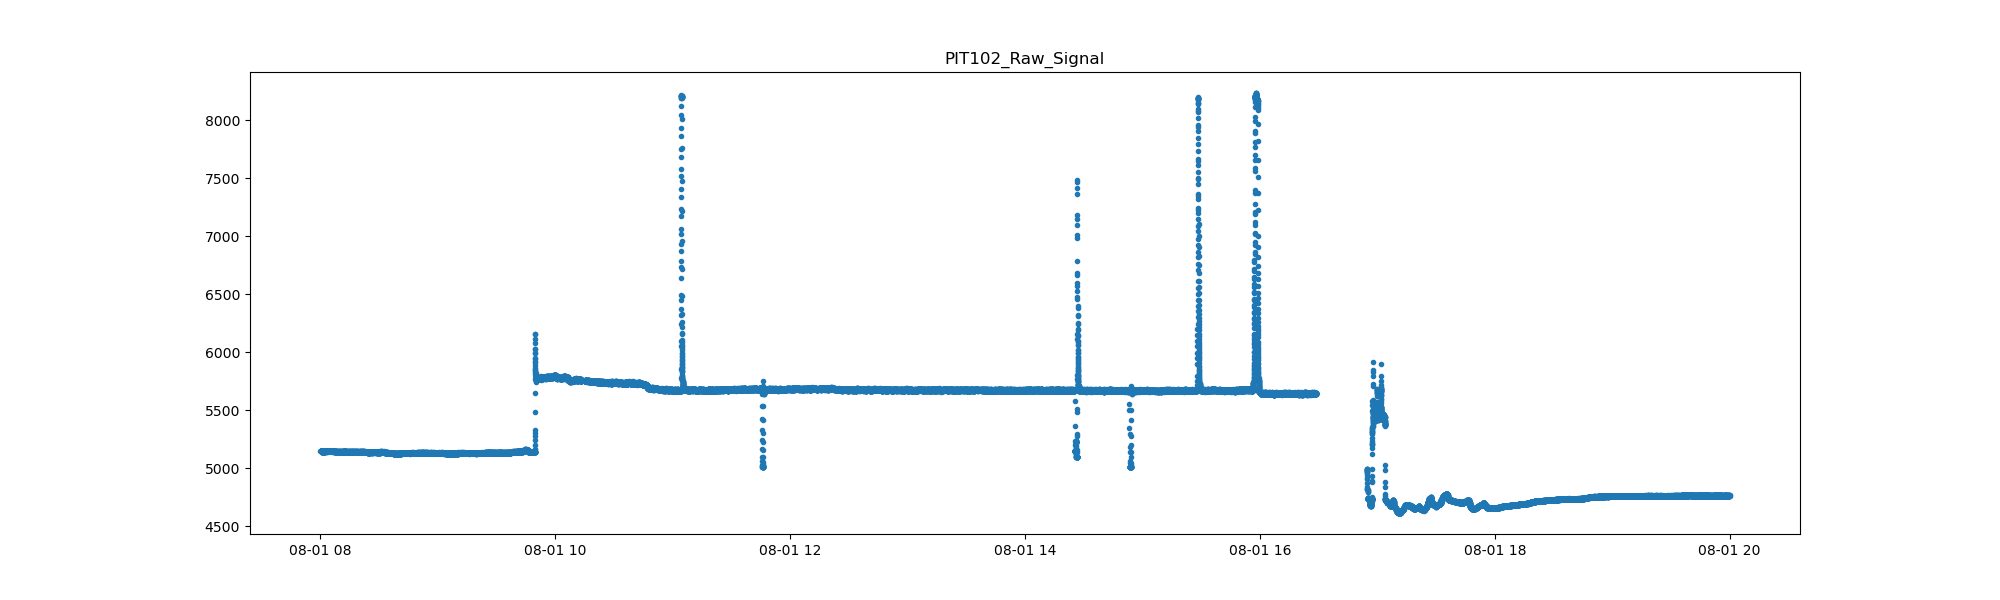

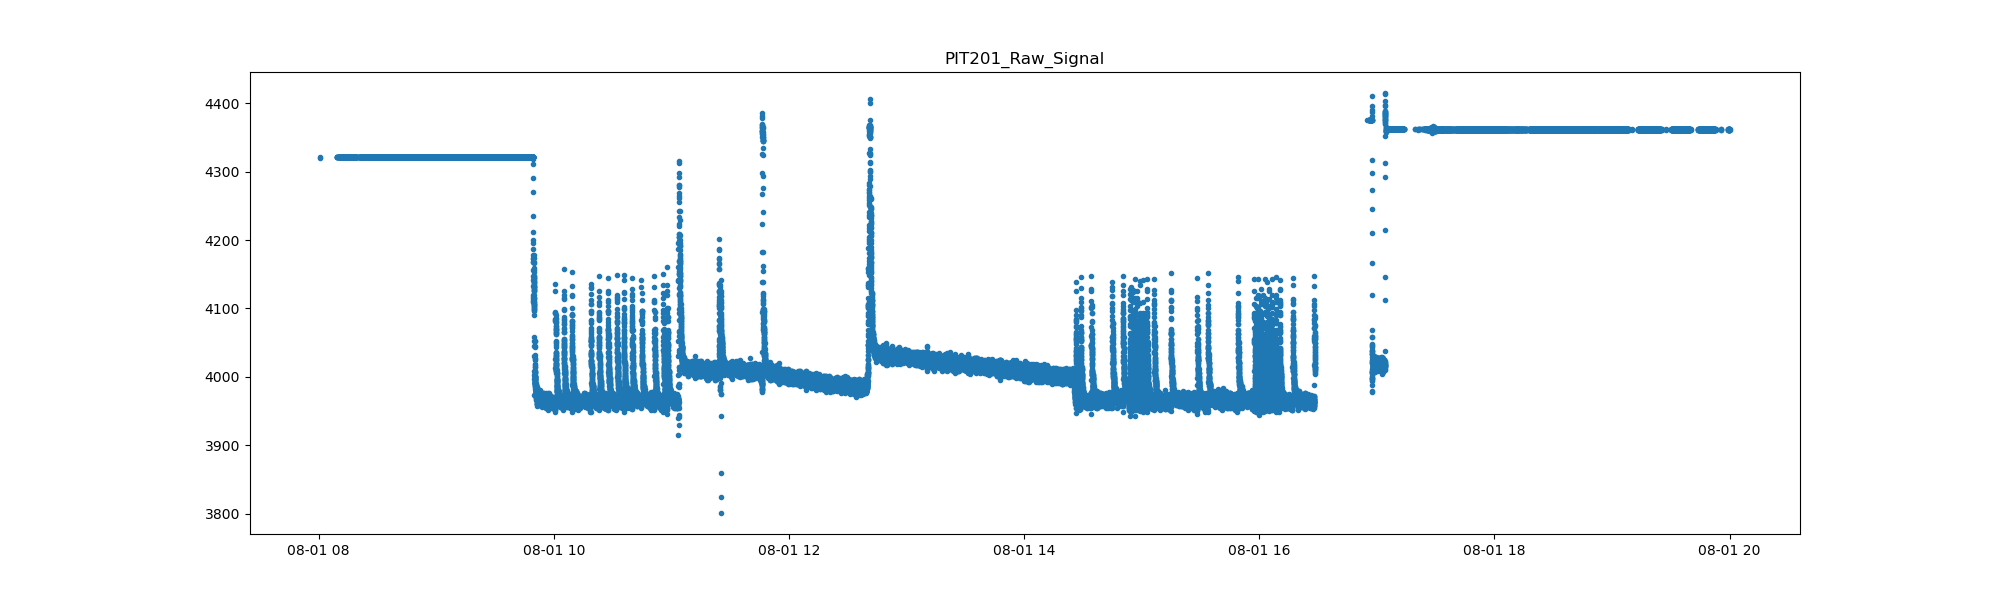

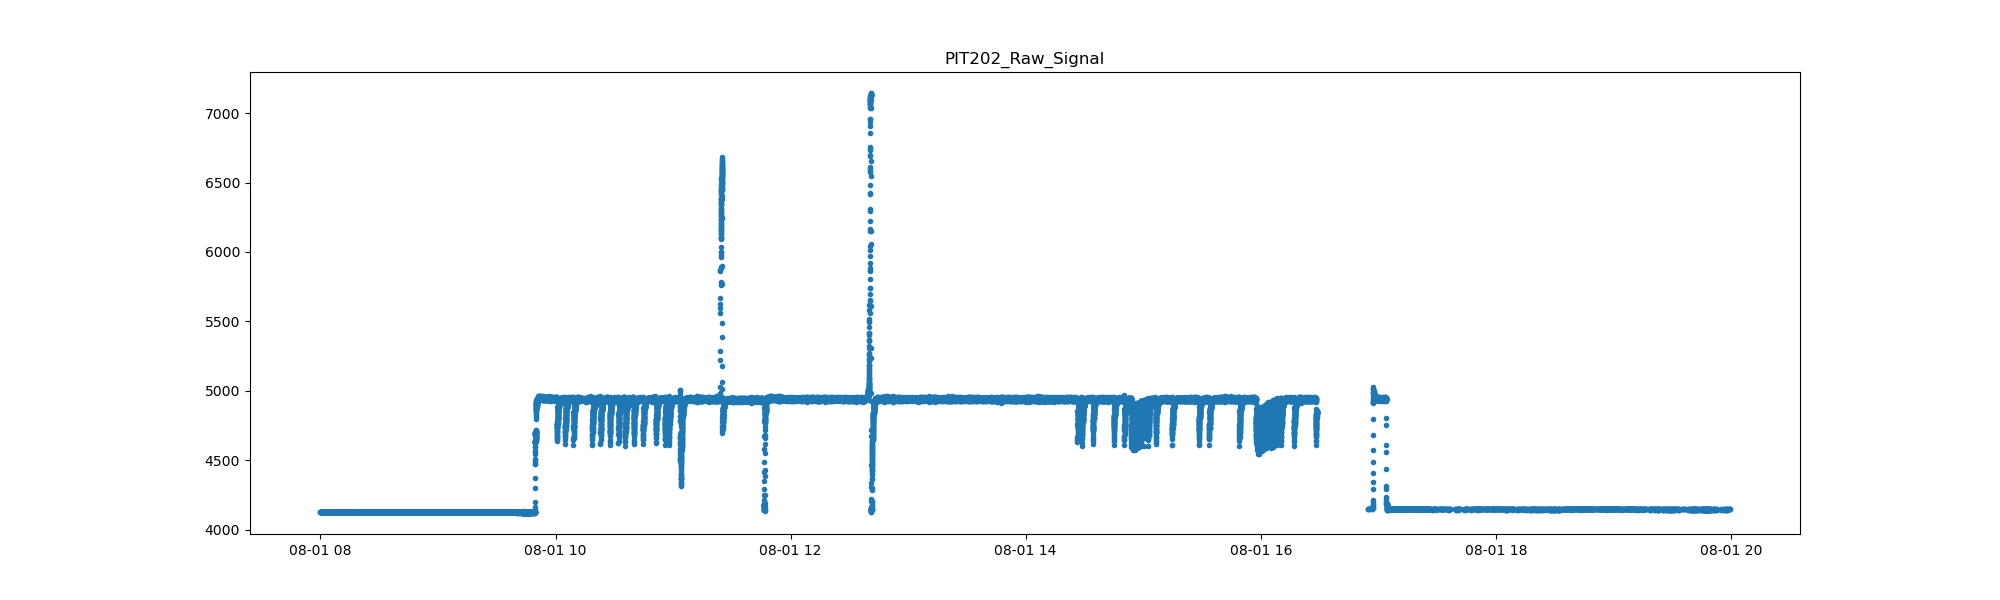

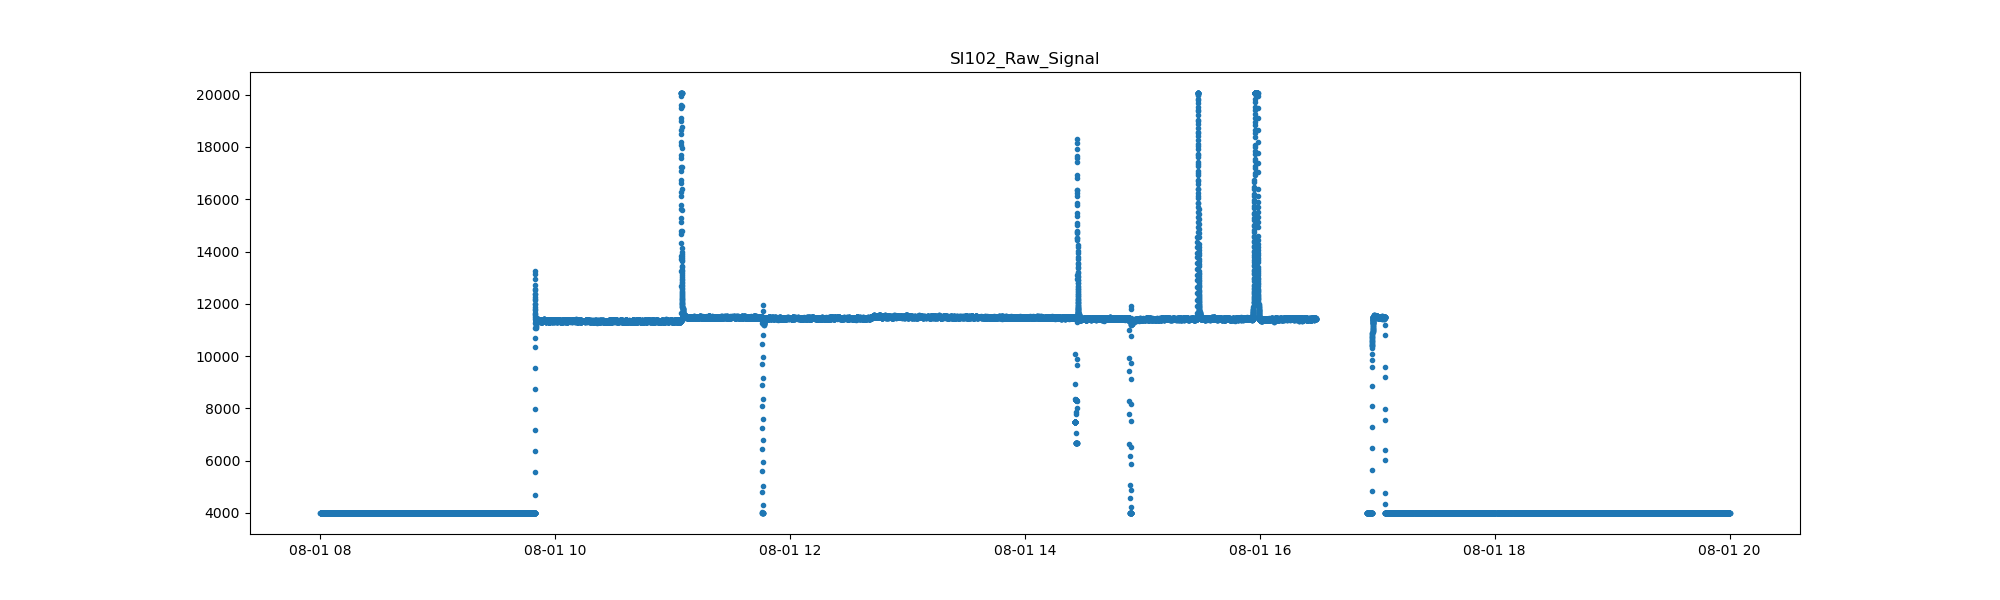

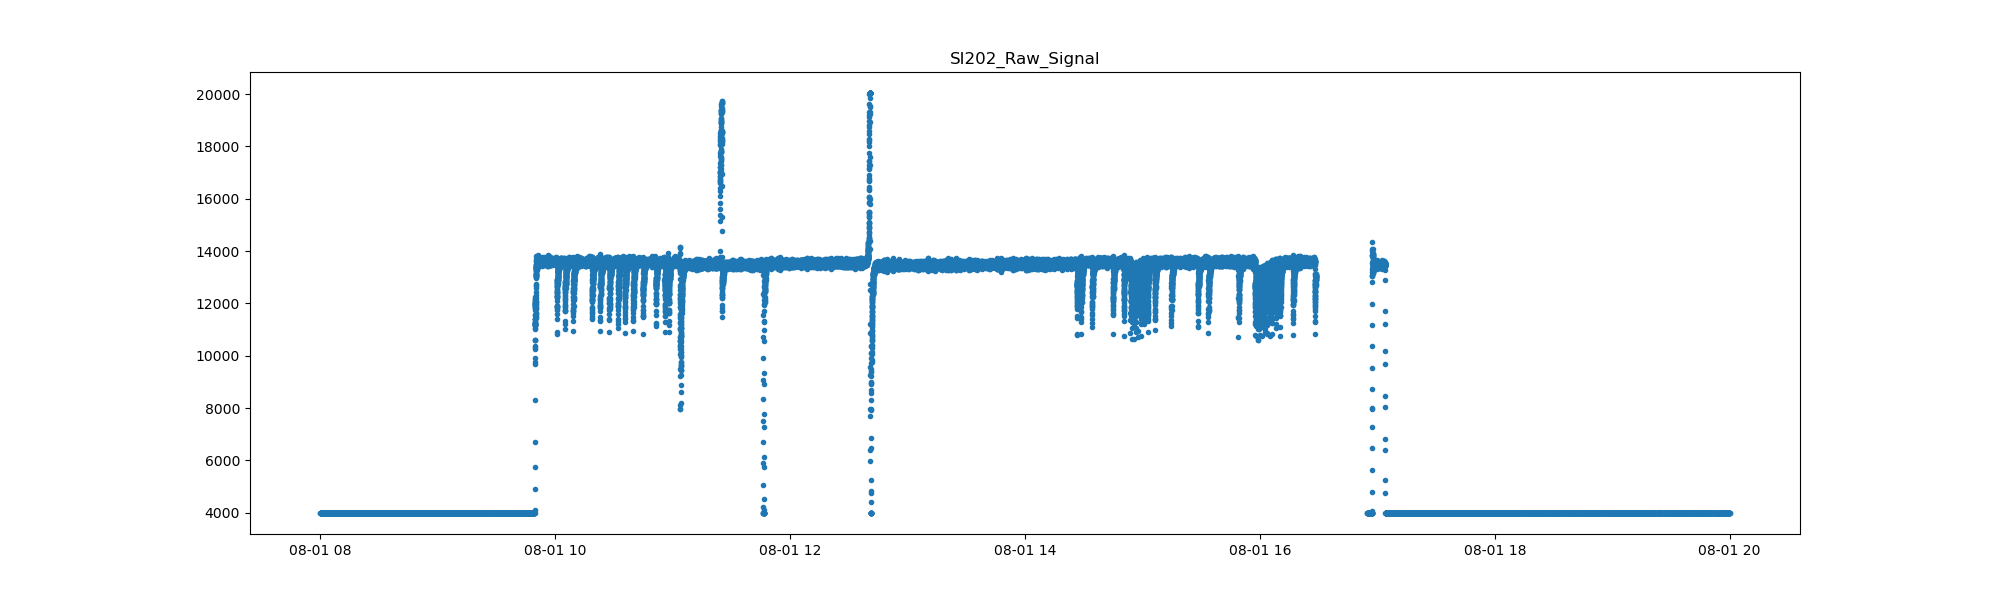

In [34]:
i = 2
while i <= 39:
    process.feature_plot(i, i+1, raw)
    i += 4

- 10:11 dos ==> lose of sensor data from 10:13:23 to 10:15:09, many sensor data
- 11:03 injection ==> 

In [174]:
df = process.resample(raw, '1S')
df_fill = process.resample(raw, '1S', fill=True)

C:\Users\Wang\OneDrive\Data science\S2DS\Aug22_EPRI_Red\notebooks\..\helpers\flow_loop_preprocess_XW.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data.dropna(inplace=True)
C:\Users\Wang\OneDrive\Data science\S2DS\Aug22_EPRI_Red\notebooks\..\helpers\flow_loop_preprocess_XW.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data.dropna(inplace=True)
C:\Users\Wang\OneDrive\Data science\S2DS\Aug22_EPRI_Red\notebooks\..\helpers\flow_loop_preprocess_XW.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

## raw values and calculated values

check if raw values are completely correlated to the calculated values

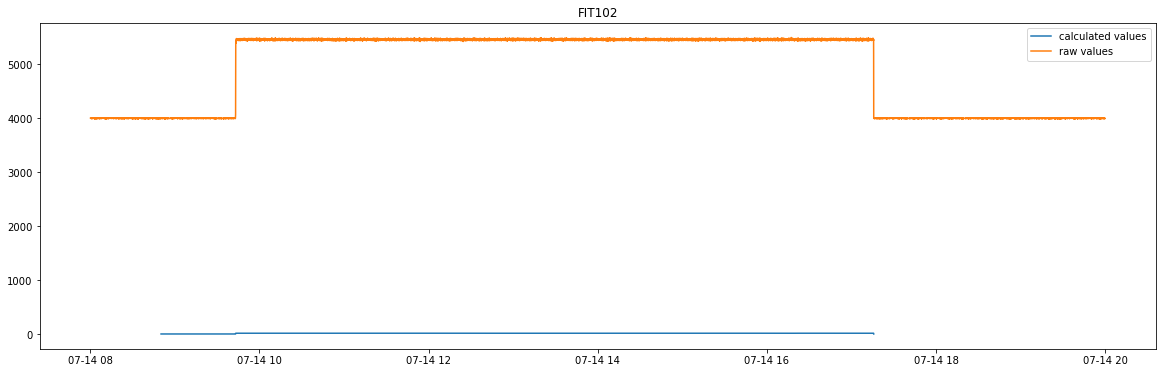

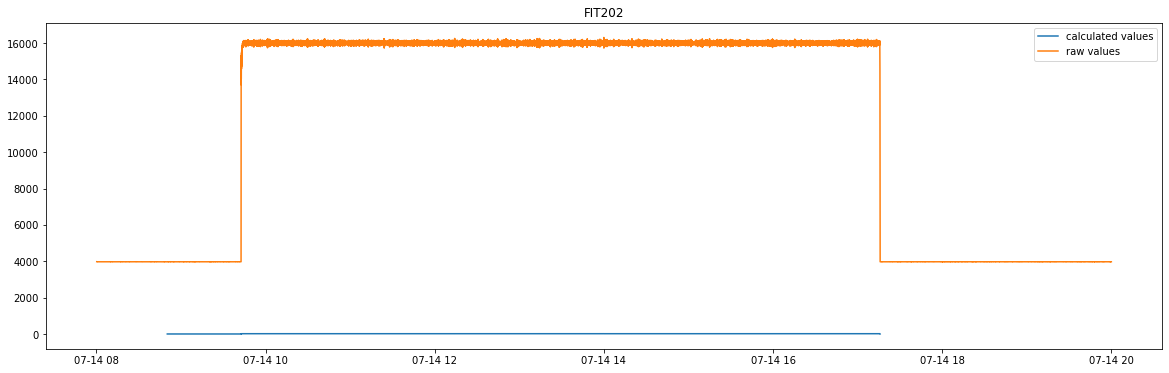

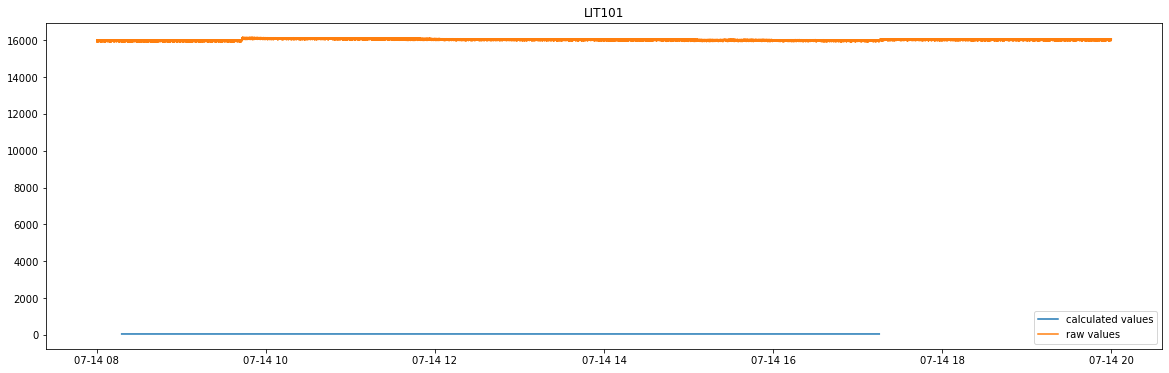

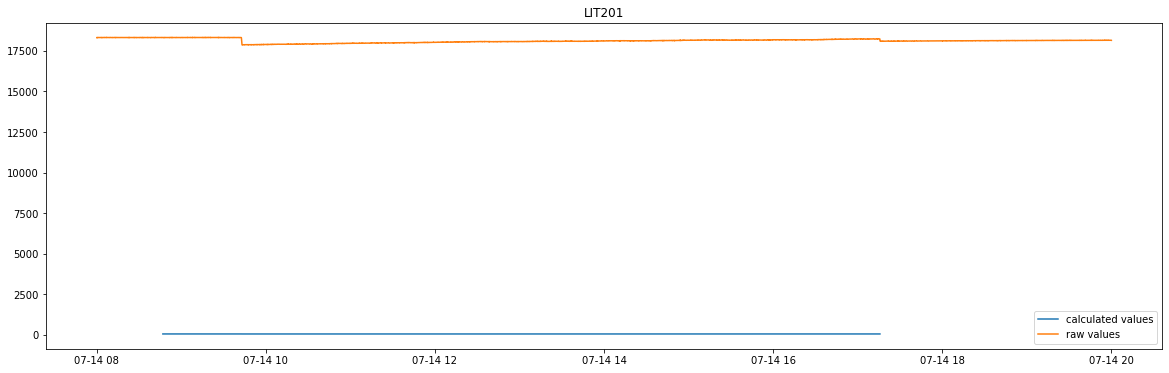

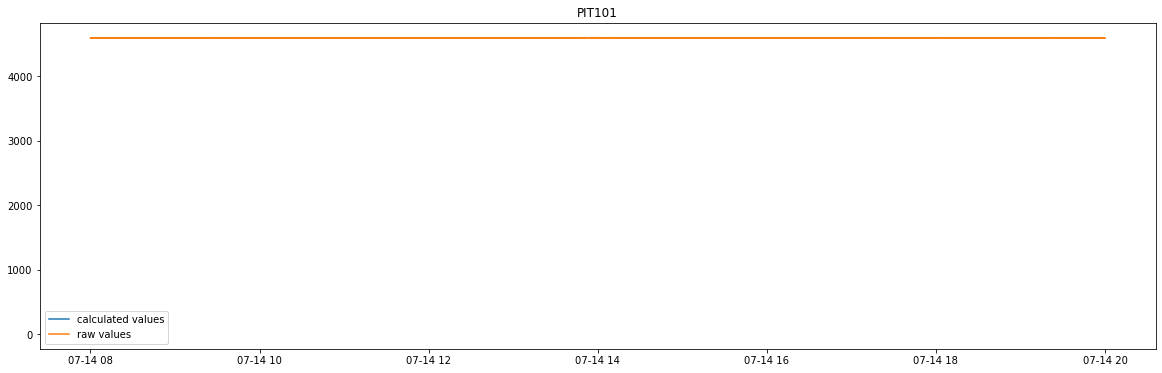

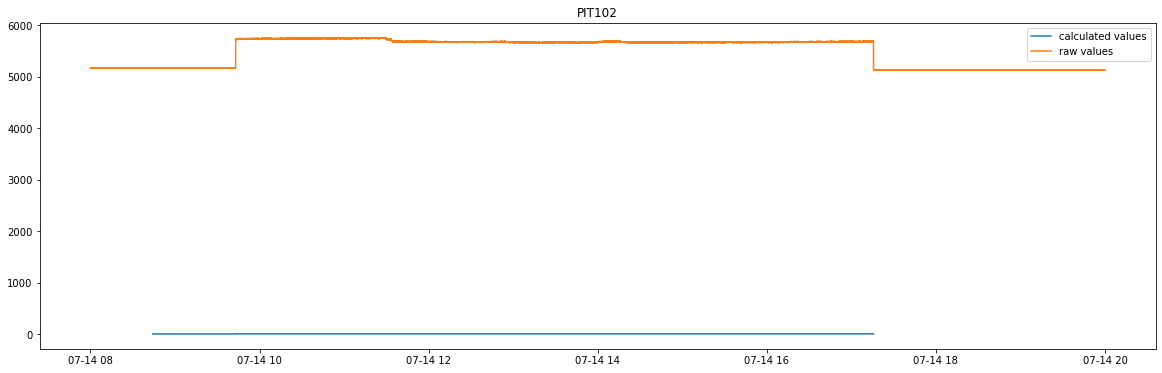

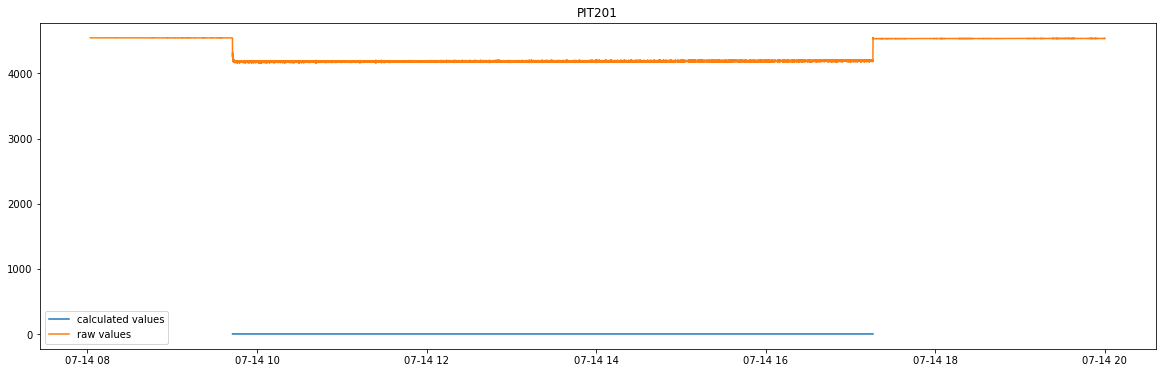

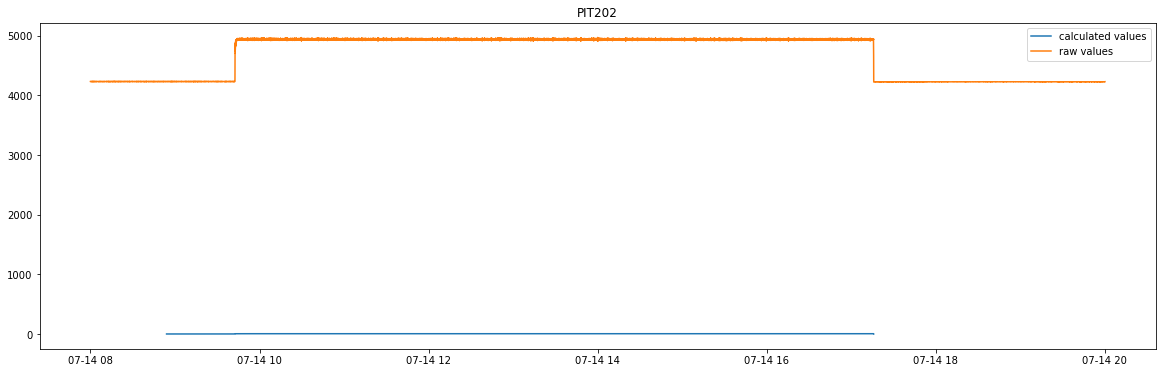

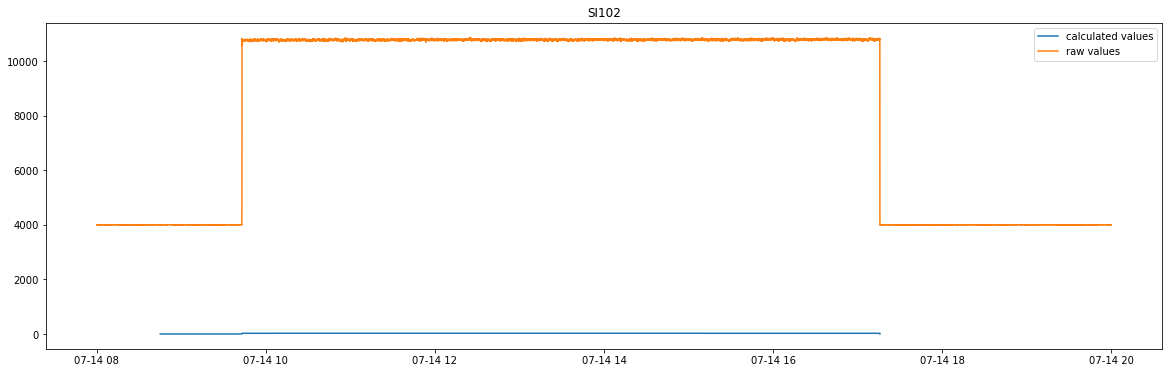

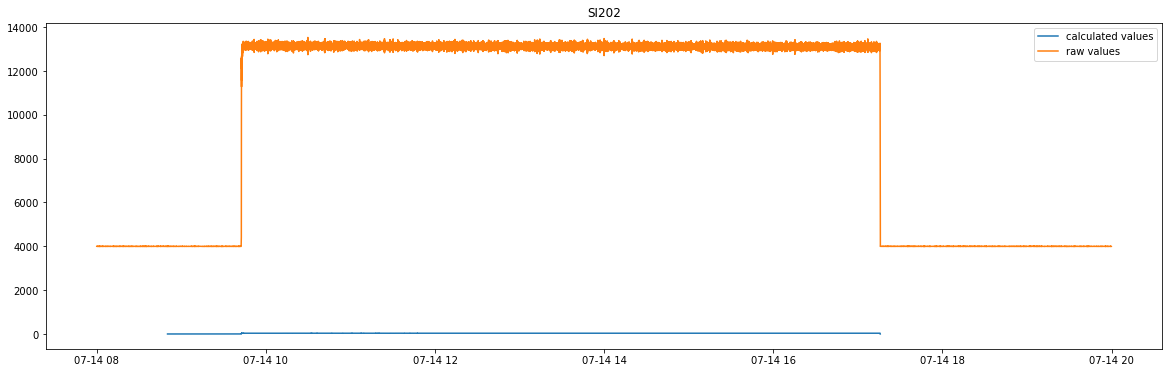

In [13]:
i = 0
while i <= 36:
    process.feature_correlation(i, i+1, i+2, i+3, raw)
    i += 4

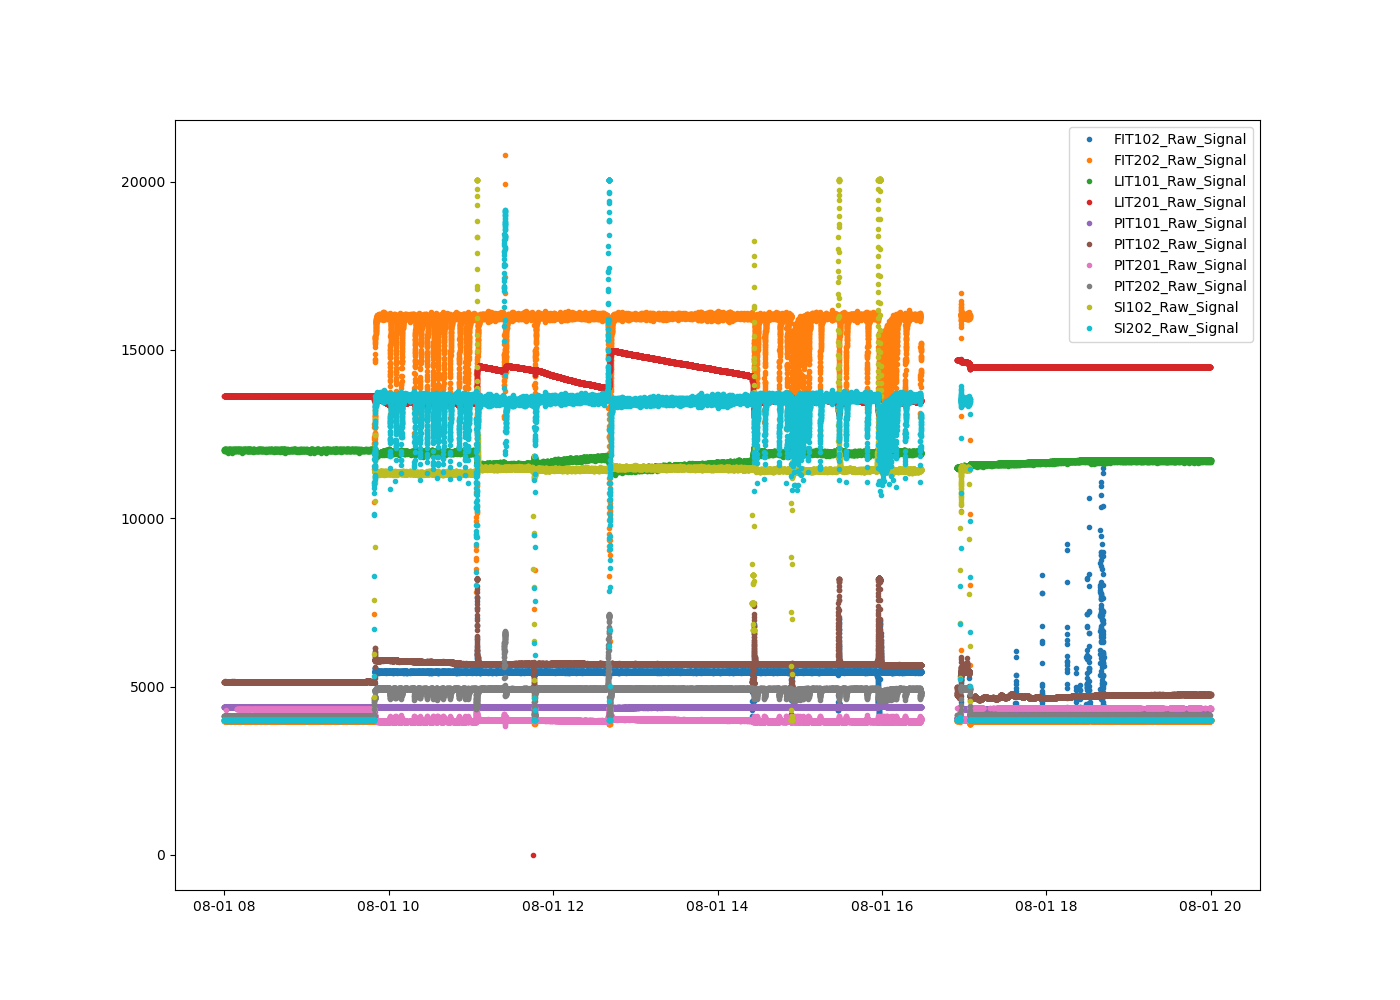

In [39]:
plt.figure(figsize=(14, 10))
plt.plot(df, '.', label=df.columns)
plt.legend()
plt.show()

In [7]:
import helpers.feature_eng_XW as feature

In [6]:
df_clean = pd.read_csv('../../Data/flow_loop/cleaned/Flow_Loop_Data_080122.csv', index_col='index')

In [7]:
test = feature.get_window(df_clean, 1000)[0]

In [8]:
test, na_feature = feature.fill_window(test)

C:\Users\Wang\OneDrive\Data science\S2DS\Aug22_EPRI_Red\notebooks\..\helpers\feature_eng_XW.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window.bfill(inplace=True)


In [9]:
na_feature

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [126]:
df_final = pd.read_csv('../../Data/flow_loop/samples/final_2.csv')

In [128]:
df_final[df_final['event'] == 'dos'].head(15)

,Unnamed: 0,max_FIT102_Raw_Signal,min_FIT102_Raw_Signal,mean_FIT102_Raw_Signal,std_FIT102_Raw_Signal,max_FIT202_Raw_Signal,min_FIT202_Raw_Signal,mean_FIT202_Raw_Signal,std_FIT202_Raw_Signal,max_LIT101_Raw_Signal,...,na_LIT201_Raw_Signal,na_PIT101_Raw_Signal,na_PIT102_Raw_Signal,na_PIT201_Raw_Signal,na_PIT202_Raw_Signal,na_SI102_Raw_Signal,na_SI202_Raw_Signal,event,binary,ternary
11377,2022-07-28 16:36:39,3.18,-2.74,0.057647,1.790208,4.78,-5.10,-0.204706,2.674954,4.00,...,0,0,0,0,0,0,0,dos,abnormal,cyber
11378,2022-07-28 16:36:49,3.18,-2.74,-0.048235,1.732384,4.78,-4.52,0.156471,2.360903,4.00,...,0,0,0,0,0,0,0,dos,abnormal,cyber
11379,2022-07-28 16:36:59,3.18,-2.74,0.025490,1.769985,2.80,-4.52,-0.120392,2.032782,4.00,...,0,0,0,0,0,0,0,dos,abnormal,cyber
11380,2022-07-28 16:37:09,3.18,-614.00,-60.168235,173.909941,2.80,-1564.76,-153.403529,442.828965,4.00,...,1,1,1,1,1,1,1,dos,abnormal,cyber
11381,2022-07-28 16:37:19,3.18,-614.00,-60.118824,173.926098,2.48,-1564.76,-153.510588,442.788924,4.00,...,1,1,1,1,1,1,1,dos,abnormal,cyber
11382,2022-07-28 16:37:29,1.84,-614.00,-60.348235,173.839752,2.48,-1564.76,-153.369412,442.840636,4.00,...,1,1,1,1,1,1,1,dos,abnormal,cyber
11383,2022-07-28 16:37:39,1.84,-614.00,-60.252941,173.874631,1.84,-1564.76,-153.367059,442.840619,4.00,...,1,1,1,1,1,1,1,dos,abnormal,cyber
11384,2022-07-28 16:37:49,1.84,-614.00,-60.284706,173.862682,0.96,-1564.76,-153.529412,442.780544,4.00,...,1,1,1,1,1,1,1,dos,abnormal,cyber
11385,2022-07-28 16:37:59,1022.68,-614.00,0.154118,315.367661,2613.00,-1564.76,0.262353,804.881452,2362.64,...,0,0,0,0,0,0,0,dos,abnormal,cyber
11832,2022-07-29 13:13:09,3.06,-2.74,0.084706,1.706700,2.20,-2.88,0.035294,1.513647,6.58,...,0,0,0,0,0,0,0,dos,abnormal,cyber


In [132]:
df_0729 = pd.read_csv('../../Data/flow_loop/cleaned/Flow_Loop_Data_072922.csv', index_col='index')
df_0729.index = pd.to_datetime(df_0729.index)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


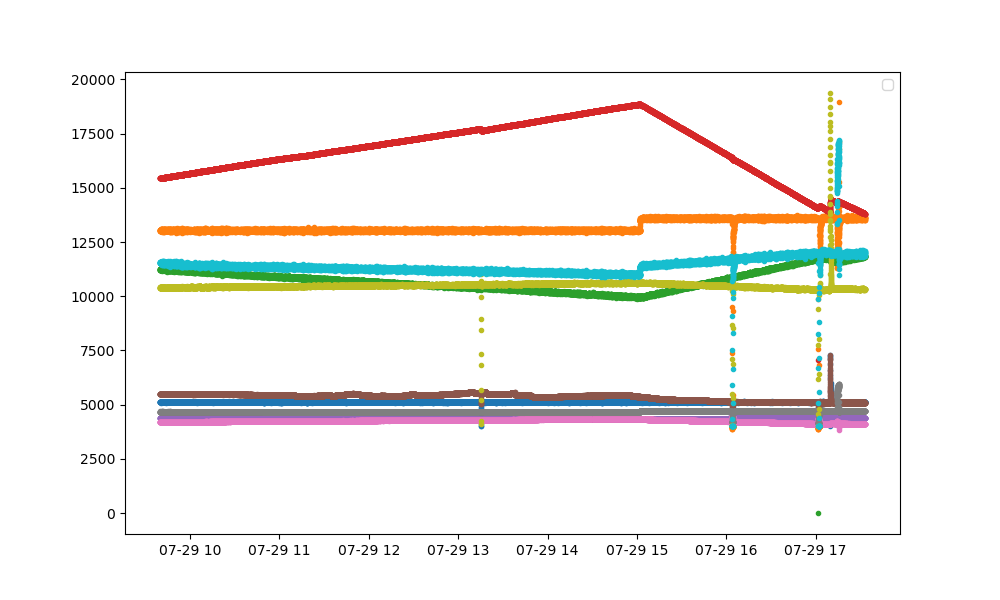

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(df_0729.iloc[:, :-1], '.')
plt.legend()
plt.show()

In [122]:
df_0728 = pd.read_csv('../../Data/flow_loop/cleaned/Flow_Loop_Data_072822.csv', index_col='index')
df_0728.index = pd.to_datetime(df_0728.index)
window = df_0728['2022-07-28 16:37:00' : '2022-07-28 16:38:30']

In [123]:
window

,FIT102_Raw_Signal,FIT202_Raw_Signal,LIT101_Raw_Signal,LIT201_Raw_Signal,PIT101_Raw_Signal,PIT102_Raw_Signal,PIT201_Raw_Signal,PIT202_Raw_Signal,SI102_Raw_Signal,SI202_Raw_Signal,event
index,,,,,,,,,,,
2022-07-28 16:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dos
2022-07-28 16:37:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dos
2022-07-28 16:37:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dos
2022-07-28 16:37:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dos
2022-07-28 16:37:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dos
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28 16:38:26,5126.0,13023.0,11824.5,13835.0,4401.0,5456.0,4139.0,4661.5,NaN,11663.0,restoring
2022-07-28 16:38:27,5120.0,13052.5,11831.5,NaN,4401.0,5459.0,4133.0,4669.0,NaN,11663.0,restoring
2022-07-28 16:38:28,NaN,13073.5,11816.0,13836.0,NaN,5456.0,4138.0,4665.0,NaN,11618.0,restoring


In [124]:
na_feature = []
for col in window.iloc[:, :-1]:
    test = window[col]

    ind = 0
    count = 0
    count_list = []
    ind_list = []
    for row in test:
        if pd.isna(row):
            count += 1
        else:
            if count >= 10:
                count_list.append(count)
                count = 0
                ind_list.append(ind)
            else:
                count = 0
        ind += 1
    if count_list:
        na_feature.append(1)
        for i in range(len(count_list)):
            end = ind_list[i]
            begin = end - count_list[i] 
            window.iloc[begin:end, :][col].fillna(0, inplace=True)
    elif count >= 10:
        na_feature.append(1)
        window[col].tail(count).fillna(0, inplace=True)
    else:
        na_feature.append(0)

In [125]:
na_feature

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [117]:
window.head(50)

,FIT102_Raw_Signal,FIT202_Raw_Signal,LIT101_Raw_Signal,LIT201_Raw_Signal,PIT101_Raw_Signal,PIT102_Raw_Signal,PIT201_Raw_Signal,PIT202_Raw_Signal,SI102_Raw_Signal,SI202_Raw_Signal,event
index,,,,,,,,,,,
2022-07-28 16:36:29,5114.5,13048.0,11836.5,13805.5,4403.0,5454.0,4131.5,4667.0,10281.5,11739.0,normal
2022-07-28 16:36:30,5109.0,13044.0,11828.5,13805.0,NaN,5452.0,4136.5,4664.0,10289.0,11646.0,dos
2022-07-28 16:36:31,5106.0,13057.5,11821.5,NaN,4401.5,5456.0,4132.5,4669.0,10304.0,11691.5,dos
2022-07-28 16:36:32,5109.5,13008.5,11812.5,13808.0,NaN,5456.5,4139.0,4662.5,10310.0,11672.0,dos
2022-07-28 16:36:33,5112.5,13079.5,11828.0,13809.0,4401.5,5456.0,4134.0,4670.5,10312.0,11662.5,dos
2022-07-28 16:36:34,5116.0,12987.0,11837.0,13808.0,4401.0,5458.0,4132.0,4663.5,10297.0,11720.5,dos
2022-07-28 16:36:35,5108.0,13073.0,11782.0,13809.0,NaN,5456.0,4131.0,4674.0,10308.5,11707.0,dos
2022-07-28 16:36:36,5118.5,12993.5,11855.0,13808.0,4402.0,5457.0,4135.0,4663.0,10308.0,11700.0,dos
2022-07-28 16:36:37,5125.0,13041.0,11862.5,NaN,4401.0,5458.0,4136.0,4669.5,10296.0,11690.5,dos


In [68]:
window.bfill(inplace=True)

In [71]:
window_gr = window.resample('5S').mean().diff() / 5

In [74]:
window_gr = window_gr.dropna()

In [76]:
grad_df = window_gr.agg(['max', 'min', 'mean', 'std'])

In [78]:
for col in grad_df:
    print(grad_df[col].to_list())

[0.0, -614.0, -170.73333333333335, 272.22231111109664]
[0.0, -1564.76, -434.72666666666663, 693.3471236449075]
[0.0, -1418.56, -394.2866666666667, 628.7531608084898]
[0.0, -1657.6799999999998, -460.3999999999999, 734.3705196697374]
[0.0, -528.16, -146.71333333333334, 234.0054131567615]
[0.0, -654.8399999999999, -181.92, 290.15014375319555]
[0.0, -495.96000000000004, -137.85, 219.82460562912422]
[0.0, -559.96, -155.54, 248.08748876152544]
[0.0, -1238.52, -343.6566666666667, 548.3343614134233]
[0.0, -1404.3799999999999, -389.26666666666665, 621.3344745196958]
